## Imports


In [1]:
import warnings

import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Audio, display

from scipy.io import wavfile


## Helper Functions


In [2]:
def generate_pitch(sample_rate, seconds, frequency):
    """
    Generate a sin curve for a given pitch.

    Parameters:
    - sample_rate (int): The number of samples per second.
    - seconds (int): The duration for which the pitch is to be generated.
    - frequency (float): The frequency of the pitch in Hz.

    Returns:
    - numpy.ndarray: A sinus curve for the given pitch with an amplitude of 30000
    """
    # Create the interval for the sin curve
    interval = np.linspace(0, seconds, seconds * sample_rate)

    # Generate the curve with an amplitude of 30000 (to match example)
    return 30000 * np.sin(frequency * 2 * np.pi * interval)


def generate_chord(*pitches):
    """
    Generate and normalize a chord from given pitches.

    Parameters:
    - *pitches (numpy.ndarray): Sin curves of individual pitches to be combined.

    Returns:
    - numpy.ndarray: A normalized chord created by summing the provided pitches.
    """
    # Add all the sin curves together
    chord = sum(pitches)

    # Normalize the chord
    max_amplitude = np.max(np.abs(chord))
    normalization_factor = 30000 / max_amplitude
    chord_normalized = chord * normalization_factor

    return chord_normalized


## Question 1 A

Creates audio of the sound that produces harmony consisting of pitches of F4 (349.228Hz), A4 (440 Hz), and C5 (523.25 Hz) that lasts for 2 seconds.
Plot this audio data for the 1st 0.05 second, and display using IPython.display (i.e., display the audio player)


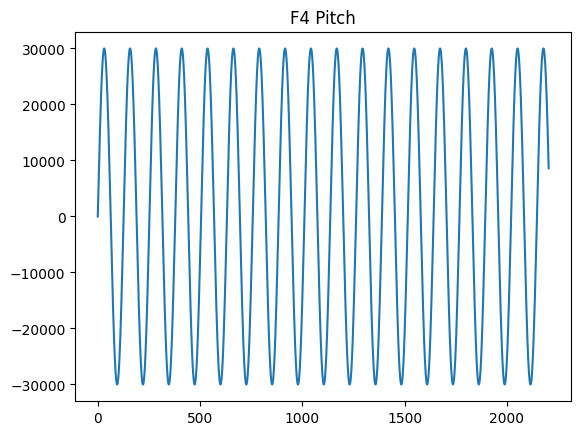

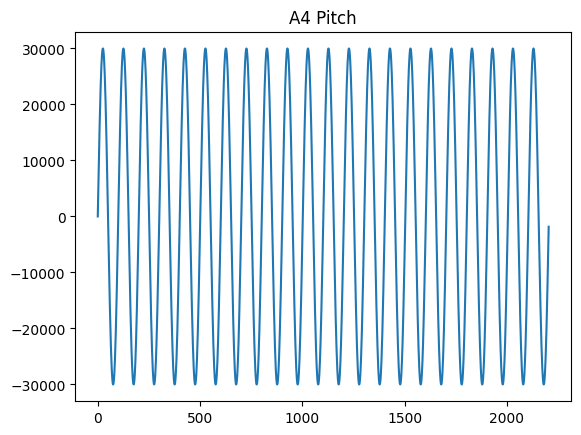

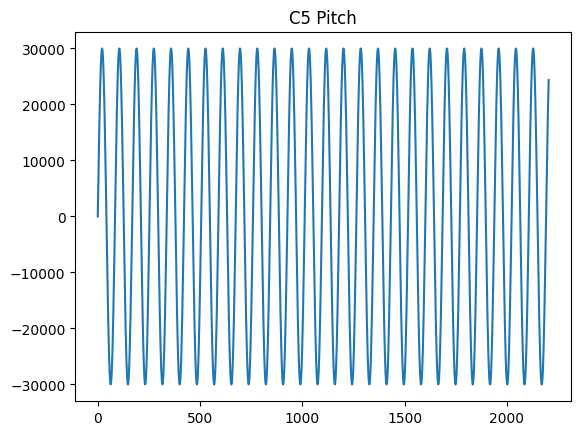

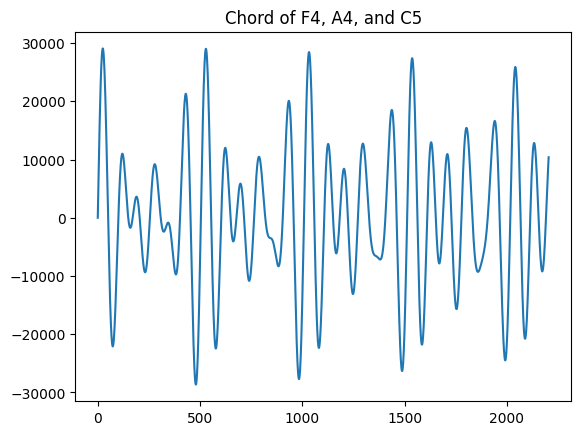

Audio: 


In [3]:
# How many times the data is sampled per second
sample_rate = 44100

# How many seconds the audio clip should be
seconds = 2

# The frequencies of the respective pitches
F4 = 349.228
A4 = 440
C5 = 523.25

# Generate the pitches
sin_F4 = generate_pitch(sample_rate=sample_rate, seconds=seconds, frequency=F4)
sin_A4 = generate_pitch(sample_rate=sample_rate, seconds=seconds, frequency=A4)
sin_C5 = generate_pitch(sample_rate=sample_rate, seconds=seconds, frequency=C5)

# Plot for sin_F4
plt.plot(sin_F4[: int(sample_rate * 0.05)])
plt.title("F4 Pitch")
plt.show()

# Plot for sin_A4
plt.plot(sin_A4[: int(sample_rate * 0.05)])
plt.title("A4 Pitch")
plt.show()

# Plot for sin_C5
plt.plot(sin_C5[: int(sample_rate * 0.05)])
plt.title("C5 Pitch")
plt.show()

# Generate the chord
chord_A = generate_chord(sin_F4, sin_A4, sin_C5)

plt.plot(chord_A[: int(sample_rate * 0.05)])
plt.title("Chord of F4, A4, and C5")
plt.show()

print("Audio: ")
display(Audio(chord_A, rate=sample_rate, autoplay=False))

## Question 1 B

E4 (329.63), G4 (391.995 Hz), Bb4 (466.16 Hz), and C#5 (554.36 Hz)


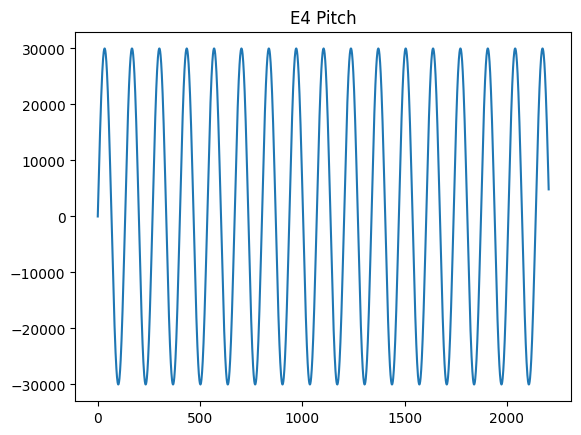

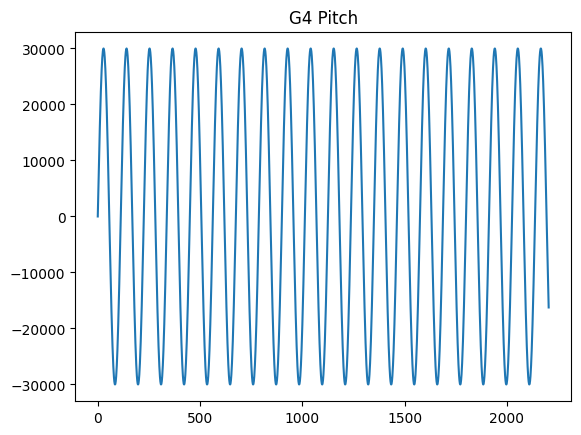

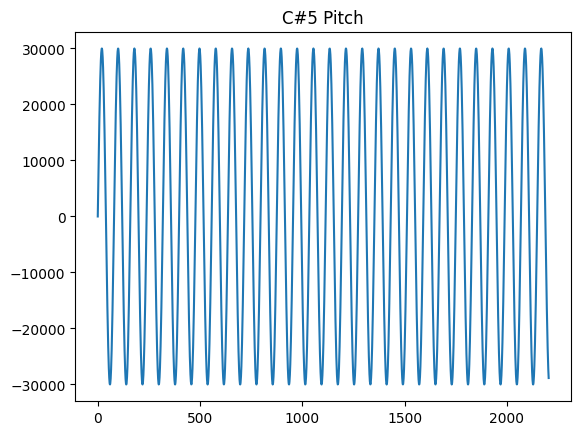

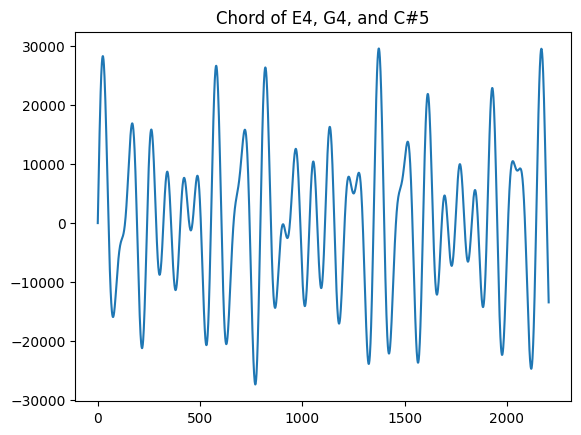

Audio: 


In [4]:
# How many times the data is sampled per second
sample_rate = 44100

# How many seconds the audio clip should be
seconds = 2

# The frequencies of the respective pitches
E4 = 329.63
G4 = 391.995
C_SHARP_5 = 554.36

# Generate the pitches
sin_E4 = generate_pitch(sample_rate=sample_rate, seconds=seconds, frequency=E4)
sin_G4 = generate_pitch(sample_rate=sample_rate, seconds=seconds, frequency=G4)
sin_C_SHARP_5 = generate_pitch(
    sample_rate=sample_rate, seconds=seconds, frequency=C_SHARP_5
)

# Plot for sin_E4
plt.plot(sin_E4[: int(sample_rate * 0.05)])
plt.title("E4 Pitch")
plt.show()

# Plot for sin_G4
plt.plot(sin_G4[: int(sample_rate * 0.05)])
plt.title("G4 Pitch")
plt.show()

# Plot for sin_C_SHARP_5
plt.plot(sin_C_SHARP_5[: int(sample_rate * 0.05)])
plt.title("C#5 Pitch")
plt.show()

# Generate the chord
chord_B = generate_chord(sin_E4, sin_G4, sin_C_SHARP_5)

plt.plot(chord_B[: int(sample_rate * 0.05)])
plt.title("Chord of E4, G4, and C#5")
plt.show()

print("Audio: ")
display(Audio(chord_B, rate=sample_rate, autoplay=False))


## Question 1 C

F4 (349.228Hz) A4 (440 Hz), and D5 (587.32 Hz)


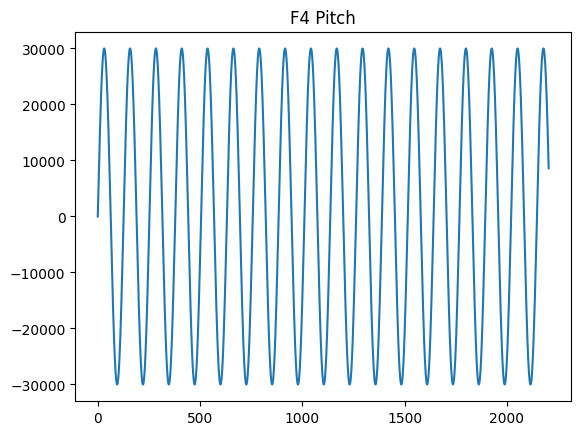

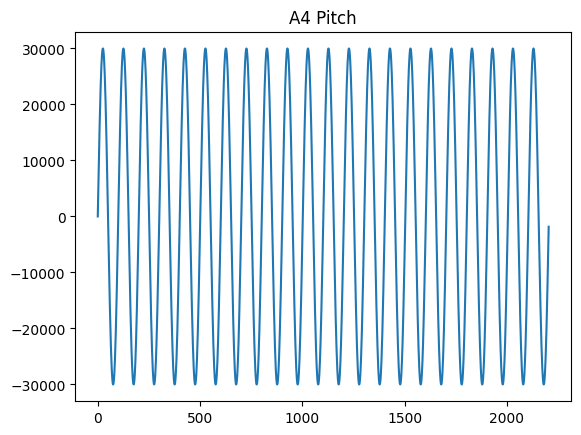

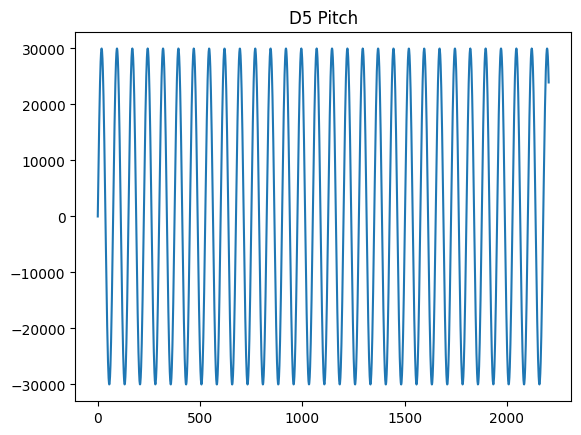

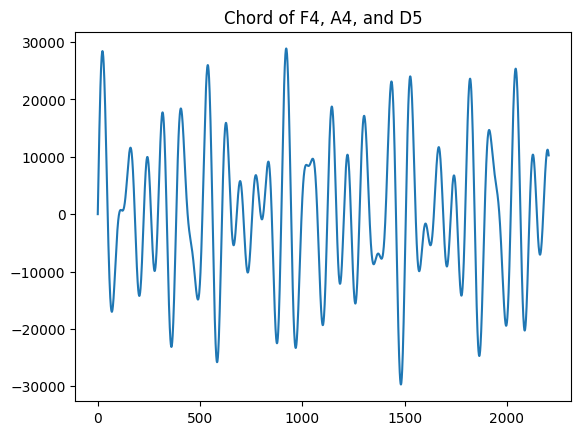

Audio: 


In [5]:
# How many times the data is sampled per second
sample_rate = 44100

# How many seconds the audio clip should be
seconds = 2

# The frequencies of the respective pitches
F4 = 349.228
A4 = 440
D5 = 587.32

# Generate the pitches
sin_F4 = generate_pitch(sample_rate=sample_rate, seconds=seconds, frequency=F4)
sin_A4 = generate_pitch(sample_rate=sample_rate, seconds=seconds, frequency=A4)
sin_D5 = generate_pitch(sample_rate=sample_rate, seconds=seconds, frequency=D5)

# Plot for sin_F4
plt.plot(sin_F4[: int(sample_rate * 0.05)])
plt.title("F4 Pitch")
plt.show()

# Plot for sin_A4
plt.plot(sin_A4[: int(sample_rate * 0.05)])
plt.title("A4 Pitch")
plt.show()

# Plot for sin_D5
plt.plot(sin_D5[: int(sample_rate * 0.05)])
plt.title("D5 Pitch")
plt.show()

# Generate the chord
chord_C = generate_chord(sin_F4, sin_A4, sin_D5)

plt.plot(chord_C[: int(sample_rate * 0.05)])
plt.title("Chord of F4, A4, and D5")
plt.show()

print("Audio: ")
display(Audio(chord_C, rate=sample_rate, autoplay=False))

## Question 1 D

Now, create another audio data that consecutively plays the above audio data and save it as a .wav file ("sequence.wav"). This file should be 6 second long (2 sec x 3 harmonies).


In [6]:
sequence = np.concatenate((chord_A, chord_B, chord_C))

print("Audio: ")
display(Audio(sequence, rate=sample_rate, autoplay=False))

# Convert to 16 bit integer or it saves weird
wavfile.write("output/sequence.wav", sample_rate, sequence.astype(np.int16))


Audio: 


## Question 2 A

Reads a .wav file (piano.wav) and plot the data.


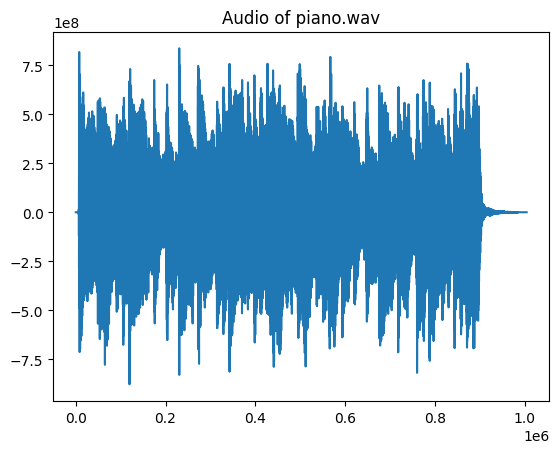

In [7]:
# Read the .wav file and stop the annoying WavFileWarning
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=wavfile.WavFileWarning)
    sample_rate, audio_data = wavfile.read("given_files/piano.wav")

# Plot the audio data
plt.plot(audio_data)
plt.title("Audio of piano.wav")
plt.show()


## Question 2 B

Decrease the amplitude to 1/10 of the original for seconds 3 to 5 (inclusive)
Plot the revised data and write the resulting modified audio as a new file ("decreased.wav").


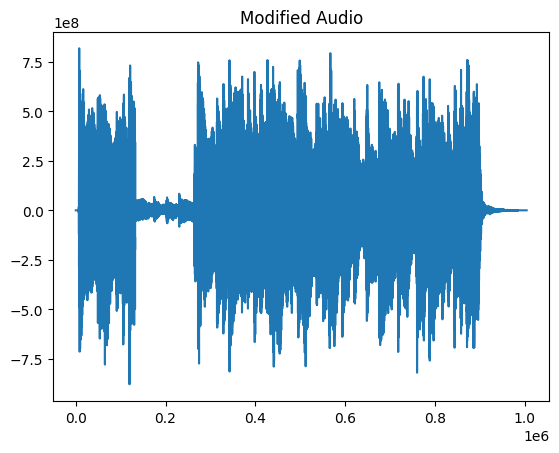

In [8]:
start_index = 3 * sample_rate
end_index = 6 * sample_rate

# Decrease amplitude to 1/10th
audio_data[start_index:end_index] = audio_data[start_index:end_index] * 0.1

# Plot the modified audio data
plt.plot(audio_data)
plt.title("Modified Audio")
plt.show()

# Write audio to decresed.wav file (dont need to convert to int16)
wavfile.write("output/decreased.wav", sample_rate, audio_data)
